In [37]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [38]:
url= "https://www.worldometers.info/coronavirus/"

In [39]:
response = requests.get(url)

In [40]:
soup = BeautifulSoup(response.text)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 117,423,647 Cases and 2,604,600 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x
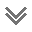

In [5]:
print(soup.prettify())

In [60]:
Table=soup.find_all('table')

print(Table)

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="No

In [70]:
ROWS=Table[0].find_all('tr')

# for row in ROWS:
#     td=row.find_all('td')
#     print(td[1].text)

data=[]

for each in ROWS:
    data.append(each.text)

# print(ROWS[9])

In [63]:
data[9]

'\n1\nUSA\n29,693,869\n+39,586\n537,826 \n+704\n20,331,446\n+57,199\n8,824,597\n13,321\n89,353\n1,618\n369,054,443\n1,110,538\n332,320,317 \nNorth America\n116181\n'

In [71]:
Data=data[9:]

In [75]:
USA=Data[0].split('\n')
USA

['',
 '1',
 'USA',
 '29,693,869',
 '+39,586',
 '537,826 ',
 '+704',
 '20,331,446',
 '+57,199',
 '8,824,597',
 '13,321',
 '89,353',
 '1,618',
 '369,054,443',
 '1,110,538',
 '332,320,317 ',
 'North America',
 '116181',
 '']

In [81]:
Covid=[]

for each_list in Data:
    
    each=each_list.split('\n')
    
    row={}
    
    row['Country']=each[2]
    row['Total_Cases']=each[3]
    row['New_cases']=each[4]
    row['Total_Deaths']=each[5]
    row['New_Deaths']=each[6]
    row['Total_Recovered']=each[7]
    row['Active_Cases']=each[9]
    row['Serious_Critical']=each[10]
    row['Total_Cases_per_1M_Pop']=each[11]
    row['Deaths_per_1M_Pop']=each[12]
    row['Total_Tests']=each[13]
    row['Tests_per_1M_Pop']=each[14]
    row['Population']=each[15]
    
    Covid.append(row)
    

In [82]:
print(Covid)

[{'Country': 'USA', 'Total_Cases': '29,693,869', 'New_cases': '+39,586', 'Total_Deaths': '537,826 ', 'New_Deaths': '+704', 'Total_Recovered': '20,331,446', 'Active_Cases': '8,824,597', 'Serious_Critical': '13,321', 'Total_Cases_per_1M_Pop': '89,353', 'Deaths_per_1M_Pop': '1,618', 'Total_Tests': '369,054,443', 'Tests_per_1M_Pop': '1,110,538', 'Population': '332,320,317 '}, {'Country': 'India', 'Total_Cases': '11,229,271', 'New_cases': '+18,691', 'Total_Deaths': '157,890 ', 'New_Deaths': '+99', 'Total_Recovered': '10,880,880', 'Active_Cases': '190,501', 'Serious_Critical': '8,944', 'Total_Cases_per_1M_Pop': '8,083', 'Deaths_per_1M_Pop': '114', 'Total_Tests': '221,430,507', 'Tests_per_1M_Pop': '159,395', 'Population': '1,389,197,541 '}, {'Country': 'Brazil', 'Total_Cases': '11,019,344', 'New_cases': '+80,024', 'Total_Deaths': '265,500 ', 'New_Deaths': '+1,054', 'Total_Recovered': '9,757,178', 'Active_Cases': '996,666', 'Serious_Critical': '8,318', 'Total_Cases_per_1M_Pop': '51,592', 'Deat

In [83]:
Covid_DF=pd.DataFrame(Covid)

In [84]:
Covid_DF

Country  Total_Cases New_cases Total_Deaths New_Deaths Total_Recovered  \
0       USA   29,693,869   +39,586     537,826        +704      20,331,446   
1     India   11,229,271   +18,691     157,890         +99      10,880,880   
2    Brazil   11,019,344   +80,024     265,500      +1,054       9,757,178   
3    Russia    4,322,776   +10,595      89,094        +368       3,911,924   
4        UK    4,218,520    +5,177     124,501         +82       3,199,565   
..      ...          ...       ...          ...        ...             ...   
224  Total:   35,122,103  +128,936      835,001     +1,733      24,637,453   
225  Total:    3,992,795    +7,734      105,890       +220       3,554,724   
226  Total:       51,645       +72        1,093                     34,325   
227  Total:          721                     15                        706   
228  Total:  117,429,672  +360,877    2,604,758     +5,494      92,934,105   

    Active_Cases Serious_Critical Total_Cases_per_1M_Pop Deaths_per_1M_Pop  \
0      8,824,597           13,321                 89,353             1,618   
1        190,501            8,944                  8,083               114   
2        996,666            8,318                 51,592             1,243   
3        321,758            2,300                 29,613               610   
4        894,454            1,542                 61,920             1,827   
..           ...              ...                    ...               ...   
224    9,649,649           26,285                                            
225      332,181            2,498                                            
226       16,227                3                                            
227            0                0                                            
228   21,890,809           89,738               15,065.1             334.2   

     Total_Tests Tests_per_1M_Pop      Population  
0    369,054,443        1,110,538    332,320,317   
1    221,430,507          159,395  1,389,197,541   
2     28,600,000          133,905    213,584,556   
3    112,900,000          773,409    145,977,047   
4     94,197,029        1,382,644     68,128,167   
..           ...              ...             ...  
224                                                
225                                                
226                                                
227                                                
228                                                

[229 rows x 13 columns]

In [89]:
Covid_DF.drop([220, 221, 222, 223, 224, 225, 226, 227], inplace=True)

In [90]:
Covid_DF

Country  Total_Cases New_cases Total_Deaths New_Deaths  \
0                 USA   29,693,869   +39,586     537,826        +704   
1               India   11,229,271   +18,691     157,890         +99   
2              Brazil   11,019,344   +80,024     265,500      +1,054   
3              Russia    4,322,776   +10,595      89,094        +368   
4                  UK    4,218,520    +5,177     124,501         +82   
..                ...          ...       ...          ...        ...   
216  Marshall Islands            4                                     
217             Samoa            3                                     
218        Micronesia            1                                     
219           Vanuatu            1                                     
228            Total:  117,429,672  +360,877    2,604,758     +5,494   

    Total_Recovered Active_Cases Serious_Critical Total_Cases_per_1M_Pop  \
0        20,331,446    8,824,597           13,321                 89,353   
1        10,880,880      190,501            8,944                  8,083   
2         9,757,178      996,666            8,318                 51,592   
3         3,911,924      321,758            2,300                 29,613   
4         3,199,565      894,454            1,542                 61,920   
..              ...          ...              ...                    ...   
216               4            0                                      67   
217               2            1                                      15   
218               1            0                                       9   
219               1            0                                       3   
228      92,934,105   21,890,809           89,738               15,065.1   

    Deaths_per_1M_Pop  Total_Tests Tests_per_1M_Pop      Population  
0               1,618  369,054,443        1,110,538    332,320,317   
1                 114  221,430,507          159,395  1,389,197,541   
2               1,243   28,600,000          133,905    213,584,556   
3                 610  112,900,000          773,409    145,977,047   
4               1,827   94,197,029        1,382,644     68,128,167   
..                ...          ...              ...             ...  
216                                                         59,461   
217                                                        199,309   
218                                                        115,840   
219                            470            1,507        311,974   
228             334.2                                                

[221 rows x 13 columns]

In [94]:
Covid_DF.replace(r'^\s*$', 0, regex=True)

Country  Total_Cases New_cases Total_Deaths New_Deaths  \
0                 USA   29,693,869   +39,586     537,826        +704   
1               India   11,229,271   +18,691     157,890         +99   
2              Brazil   11,019,344   +80,024     265,500      +1,054   
3              Russia    4,322,776   +10,595      89,094        +368   
4                  UK    4,218,520    +5,177     124,501         +82   
..                ...          ...       ...          ...        ...   
216  Marshall Islands            4         0            0          0   
217             Samoa            3         0            0          0   
218        Micronesia            1         0            0          0   
219           Vanuatu            1         0            0          0   
228            Total:  117,429,672  +360,877    2,604,758     +5,494   

    Total_Recovered Active_Cases Serious_Critical Total_Cases_per_1M_Pop  \
0        20,331,446    8,824,597           13,321                 89,353   
1        10,880,880      190,501            8,944                  8,083   
2         9,757,178      996,666            8,318                 51,592   
3         3,911,924      321,758            2,300                 29,613   
4         3,199,565      894,454            1,542                 61,920   
..              ...          ...              ...                    ...   
216               4            0                0                     67   
217               2            1                0                     15   
218               1            0                0                      9   
219               1            0                0                      3   
228      92,934,105   21,890,809           89,738               15,065.1   

    Deaths_per_1M_Pop  Total_Tests Tests_per_1M_Pop      Population  
0               1,618  369,054,443        1,110,538    332,320,317   
1                 114  221,430,507          159,395  1,389,197,541   
2               1,243   28,600,000          133,905    213,584,556   
3                 610  112,900,000          773,409    145,977,047   
4               1,827   94,197,029        1,382,644     68,128,167   
..                ...          ...              ...             ...  
216                 0            0                0         59,461   
217                 0            0                0        199,309   
218                 0            0                0        115,840   
219                 0          470            1,507        311,974   
228             334.2            0                0               0  

[221 rows x 13 columns]

In [95]:
Covid_DF

Country  Total_Cases New_cases Total_Deaths New_Deaths  \
0                 USA   29,693,869   +39,586     537,826        +704   
1               India   11,229,271   +18,691     157,890         +99   
2              Brazil   11,019,344   +80,024     265,500      +1,054   
3              Russia    4,322,776   +10,595      89,094        +368   
4                  UK    4,218,520    +5,177     124,501         +82   
..                ...          ...       ...          ...        ...   
216  Marshall Islands            4                                     
217             Samoa            3                                     
218        Micronesia            1                                     
219           Vanuatu            1                                     
228            Total:  117,429,672  +360,877    2,604,758     +5,494   

    Total_Recovered Active_Cases Serious_Critical Total_Cases_per_1M_Pop  \
0        20,331,446    8,824,597           13,321                 89,353   
1        10,880,880      190,501            8,944                  8,083   
2         9,757,178      996,666            8,318                 51,592   
3         3,911,924      321,758            2,300                 29,613   
4         3,199,565      894,454            1,542                 61,920   
..              ...          ...              ...                    ...   
216               4            0                                      67   
217               2            1                                      15   
218               1            0                                       9   
219               1            0                                       3   
228      92,934,105   21,890,809           89,738               15,065.1   

    Deaths_per_1M_Pop  Total_Tests Tests_per_1M_Pop      Population  
0               1,618  369,054,443        1,110,538    332,320,317   
1                 114  221,430,507          159,395  1,389,197,541   
2               1,243   28,600,000          133,905    213,584,556   
3                 610  112,900,000          773,409    145,977,047   
4               1,827   94,197,029        1,382,644     68,128,167   
..                ...          ...              ...             ...  
216                                                         59,461   
217                                                        199,309   
218                                                        115,840   
219                            470            1,507        311,974   
228             334.2                                                

[221 rows x 13 columns]

In [99]:
Covid_DF.to_csv('Covid_Info.csv')